In [5]:
import numpy as np
import pickle
import os
import scipy.cluster.hierarchy as sch
import pandas as pd

In [2]:
# Define the root directory
dataset = 'sc_vsmc'


In [6]:
def overview(dataset):
    name = 'Dataset-'+dataset+'--RE-True--W-True--Epochs-15000--D-4--RH-25--LR-0.1--LP-False--CUDA-True'
    root = root = '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/thesis/HBDM/results/models/'+name
    variable_names = ['k_exp_dist', 'general_cl_id', 'general_mask']
    # Initialize a dictionary to store the loaded variables
    loaded_variables = {}

    # Loop through the variable names and load the data from pickle files
    for var_name in variable_names:
        file_path = os.path.join(root, var_name + '.pkl')
        with open(file_path, 'rb') as f:
            loaded_data = pickle.load(f)
        loaded_variables[var_name] = loaded_data

    # Access the loaded variables as needed
    k_exp_dist = loaded_variables['k_exp_dist']
    # final_idx = loaded_variables['final_idx']
    general_cl_id = loaded_variables['general_cl_id']
    general_mask = loaded_variables['general_mask']

    k_exp_dist = np.array(k_exp_dist)
    level_list = []
    # check the cluster ids in different levels
    for level, i in enumerate(general_cl_id):
        a = list(set(i))
        level_list.append(a)
        print(len(list(set(i))),' cluster num in level ',level+1)
    # Create your matrix of within-cluster Euclidean distances
    distance_matrix = k_exp_dist[:10,:10]
    # Perform hierarchical clustering
    linkage_matrix = sch.linkage(distance_matrix, method='average')
    dendrogram = sch.dendrogram(linkage_matrix, color_threshold=0)
    return general_cl_id, general_mask, level_list

def hierachical_structure(dataset,general_cl_id, general_mask, level_list):
    index_dict = dict()
    for i, l in enumerate(general_cl_id):
        for j, cluster in enumerate(l):
            if cluster in index_dict:
                index_dict[cluster].append(general_mask[i][j])
            else:
                index_dict[cluster] = [general_mask[i][j]]
    level_dict = dict()
    for i in range(len(level_list)):
        if i == len(level_list)-1:
            l = level_list[i]
            for c1 in l:
                level_dict[c1] = []
        else:
            l = level_list[i]
            subl = level_list[i+1]
            # print(l,subl)
            for c1 in l:
                # print(c1)
                for c2 in subl:
                    # print(c2)
                    if set(index_dict[c1]) & set(index_dict[c2]):
                        # print(c2 ,'in',c1)
                        if c1 in level_dict:
                            level_dict[c1].append(c2)
                        else:
                            level_dict[c1] = [c2]
                if c1 not in level_dict:
                    level_dict[c1] = []

    ## get node and cluster
    df = pd.DataFrame({'node':range(max(list(set(general_mask[0])))+1)})
    for i, level in enumerate(general_cl_id):
        clusters = list(set(level))
        col = []
        ori_index = []
        colname = 'level_'+str(i+1)
        for key in clusters:
            col += len(index_dict[key])*[int(key)]
            ori_index.extend(index_dict[key])
        dftemp = pd.DataFrame({'node': ori_index, colname: col})
        df = df.merge(dftemp,how='left')
    convertpath = '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/thesis/HBDM/data/datasets/'+dataset+'/ppi_index.pkl'
    with open(convertpath, 'rb') as file:
        ppi_index = pickle.load(file)
    inv_dict = {v: k for k, v in ppi_index.items()}
    df['gene'] = df['node'].map(inv_dict)
    return df, level_dict

9  cluster num in level  1
18  cluster num in level  2
36  cluster num in level  3
72  cluster num in level  4
140  cluster num in level  5
186  cluster num in level  6
122  cluster num in level  7
36  cluster num in level  8
16  cluster num in level  9


/tmp/ipykernel_3233440/1799110865.py:31: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='average')


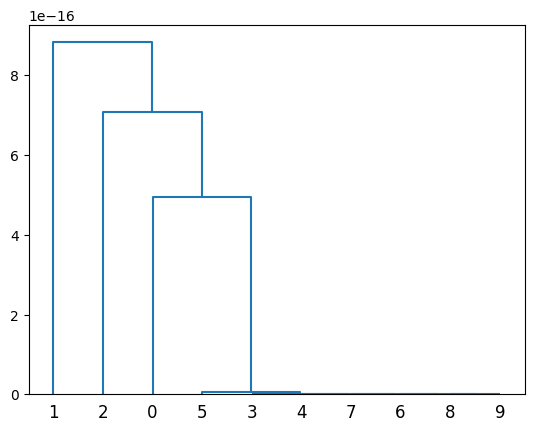

In [7]:
general_cl_id, general_mask, level_list = overview(dataset)
df, level_dict= hierachical_structure(dataset,general_cl_id, general_mask, level_list)

In [8]:
level_dict

{0: [9, 10],
 1: [11, 12],
 2: [13, 14],
 3: [15, 16],
 4: [17, 18],
 5: [19, 20],
 6: [21, 22],
 7: [23, 24],
 8: [25, 26],
 9: [27, 28],
 10: [29, 30],
 11: [31, 32],
 12: [33, 34],
 13: [35, 36],
 14: [37, 38],
 15: [39, 40],
 16: [41, 42],
 17: [43, 44],
 18: [45, 46],
 19: [47, 48],
 20: [49, 50],
 21: [51, 52],
 22: [53, 54],
 23: [55, 56],
 24: [57, 58],
 25: [59, 60],
 26: [61, 62],
 27: [63, 64],
 28: [65, 66],
 29: [67, 68],
 30: [69, 70],
 31: [71, 72],
 32: [73, 74],
 33: [75, 76],
 34: [77, 78],
 35: [79, 80],
 36: [81, 82],
 37: [83, 84],
 38: [85, 86],
 39: [87, 88],
 40: [89, 90],
 41: [91, 92],
 42: [93, 94],
 43: [95, 96],
 44: [97, 98],
 45: [99, 100],
 46: [101, 102],
 47: [103, 104],
 48: [105, 106],
 49: [107, 108],
 50: [109, 110],
 51: [111, 112],
 52: [113, 114],
 53: [115, 116],
 54: [117, 118],
 55: [119, 120],
 56: [121, 122],
 57: [123, 124],
 58: [125, 126],
 59: [128, 127],
 60: [129, 130],
 61: [131, 132],
 62: [133, 134],
 128: [261, 262],
 129: [263, 2